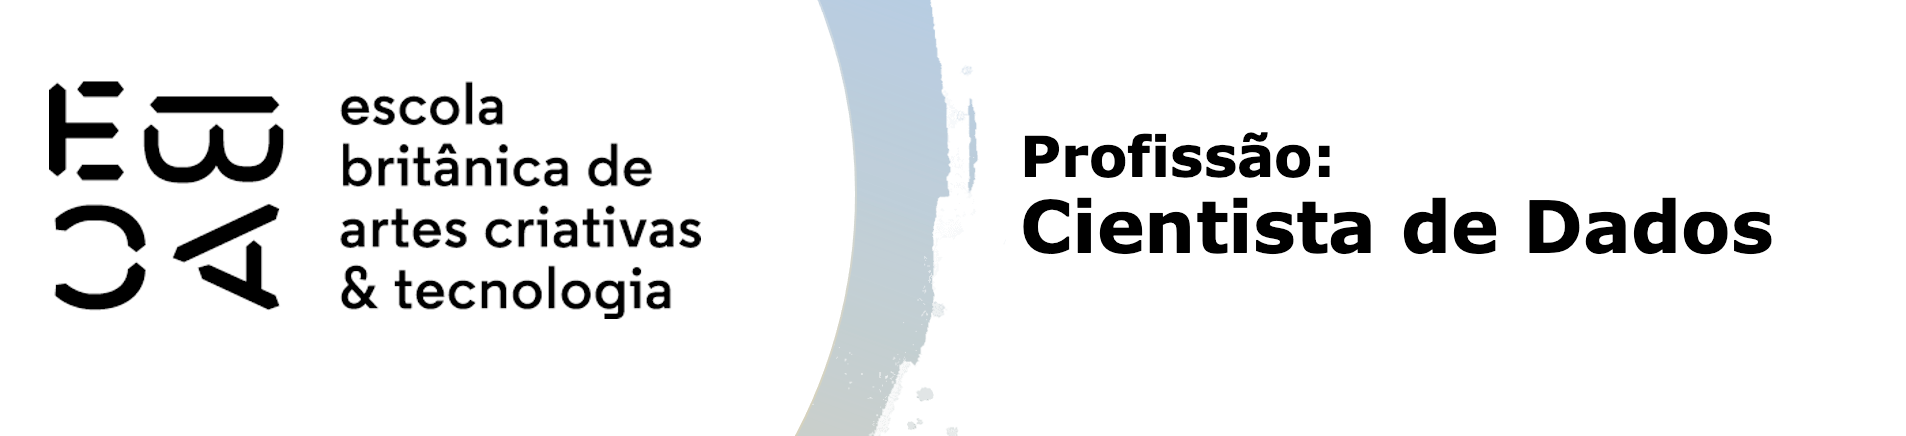

# Tarefa II

Ainda sobre a base da NFP vista na tarefa passada:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [401]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_pickle('base_nfp.pkl')
df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes


In [402]:
df.dtypes

CNPJ emit.                     object
Emitente                       object
No.                             int64
Data Emissão           datetime64[ns]
Valor NF                      float64
Data Registro          datetime64[ns]
Créditos                      float64
Situação do Crédito          category
Ano                             int64
Semestre                        int64
Retorno                       float64
flag_credito                    int64
categoria                      object
dtype: object

## Criando variáveis

**Variáveis temporais**: É possível que haja alguma regra de liberação de créditos de acordo com o dia do mês, o dia da semana, fim de semana (sim ou não), ou até alterações temporais da regra. Vamos criar as seguintes variáveis para testar estas hipóteses:

- Dia da semana
- Dummy para fim de semana
- Dia do mês
- Mês (já na base)
- Trimestre
- Ano (já na base)

**Valor da nota**: Vamos criar também algumas variáveis para resumir o valor da nota, e posteriormente criar uma intuição sobre categorizações de variáveis contínuas.

- Crie categorizações da variável ```Valor NF```, por quantís, em 5, 10, 20 e 50 categorias.

In [404]:
df['Data Registro'] = pd.to_datetime(df['Data Registro'])

In [405]:
df['dia'] = df['Data Registro'].dt.day
df['mes'] = df['Data Registro'].dt.month
df['ano'] = df['Data Registro'].dt.year
df['dia_semana'] = df['Data Registro'].dt.dayofweek
df['trimestre'] = pd.cut(df['mes'], bins=[0, 3, 6, 9, 12], labels=['1', '2', '3', '4'], right=True)
df['fim_de_semana'] = df['Data Registro'].dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0)
df['valor_nf_cat_5'] = pd.qcut(df['Valor NF'], q=5, labels=False)
df['valor_nf_cat_10'] = pd.qcut(df['Valor NF'], q=10, labels=False)
df['valor_nf_cat_20'] = pd.qcut(df['Valor NF'], q=20, labels=False)
df['valor_nf_cat_50'] = pd.qcut(df['Valor NF'], q=50, labels=False)

## Calcule o IV de todas essas variáveis

Sugestão: Construa um metadados e tente utilizar uma função como a que foi utilizada durante a aula. Você vai conseguir fazer esse cálculo para as variáveis uma a uma, mas em casos reais em que vamos mais além na criação de variáveis, podemos ter centenas, ou até milhares de variáveis, esses cálculos *precisam* ser automáticos nesses casos.

In [407]:
df.drop(columns=['Data Emissão', 'No.', 'Emitente', 'CNPJ emit.', 'Retorno', 'Créditos', 'Data Registro'], inplace=True)
metadados = pd.DataFrame({'dtype':df.dtypes})

In [408]:
metadados['papel'] = 'covariavel'
metadados.loc['flag_credito','papel'] = 'resposta'
metadados['nunique'] = df.nunique()
metadados

,dtype,papel,nunique
Valor NF,float64,covariavel,33658
Situação do Crédito,category,covariavel,3
Ano,int64,covariavel,5
Semestre,int64,covariavel,2
flag_credito,int64,resposta,2
categoria,object,covariavel,9
dia,int32,covariavel,31
mes,int32,covariavel,12
ano,int32,covariavel,6
dia_semana,int32,covariavel,7


In [409]:
def IV(variavel, resposta):
    tab = pd.crosstab(variavel, resposta, margins=True, margins_name='total')

    rótulo_evento = tab.columns[0]
    rótulo_nao_evento = tab.columns[1]

    tab['pct_evento'] = tab[rótulo_evento]/tab.loc['total',rótulo_evento]
    tab['pct_nao_evento'] = tab[rótulo_nao_evento]/tab.loc['total',rótulo_nao_evento]
    tab['woe'] = np.log(tab.pct_evento/tab.pct_nao_evento)
    tab['iv_parcial'] = (tab.pct_evento - tab.pct_nao_evento)*tab.woe
    return tab['iv_parcial'].sum()

In [410]:
def create_tab(variavel, resposta):
    tab = pd.crosstab(variavel, resposta, margins=True, margins_name='total')

    rótulo_evento = tab.columns[0]
    rótulo_nao_evento = tab.columns[1]

    tab['pct_evento'] = tab[rótulo_evento]/tab.loc['total',rótulo_evento]
    tab['pct_nao_evento'] = tab[rótulo_nao_evento]/tab.loc['total',rótulo_nao_evento]
    tab['woe'] = np.log(tab.pct_evento/tab.pct_nao_evento)
    tab['iv_parcial'] = (tab.pct_evento - tab.pct_nao_evento)*tab.woe
    return tab

In [411]:
create_tab(df['categoria'], df['flag_credito'])

flag_credito,0,1,total,pct_evento,pct_nao_evento,woe,iv_parcial
categoria,,,,,,,
Alimentos,2092,12868,14960,0.020309,0.152036,-2.013046,0.265172
Auto posto,3418,271,3689,0.033182,0.003202,2.338269,0.070101
Construção,18425,13811,32236,0.178870,0.163177,0.091820,0.001441
Farmácia,10054,4886,14940,0.097604,0.057728,0.525173,0.020942
Mercado,22887,19808,42695,0.222187,0.234032,-0.051940,0.000615
Restaurantes,22631,17118,39749,0.219701,0.202250,0.082767,0.001444
Varejo,4869,1035,5904,0.047268,0.012229,1.352064,0.047376
Vestuário,1813,1799,3612,0.017601,0.021255,-0.188671,0.000690
não definido,16819,13042,29861,0.163279,0.154092,0.057911,0.000532


In [412]:
target = 'flag_credito'

In [413]:
iv_values = {}
for column in df.columns:
    if column != target:
        iv_values[column] = IV(df[column], df[target])

iv_df = pd.DataFrame(list(iv_values.items()), columns=['Variable', 'IV'])

C:\Users\Hanga\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [414]:
iv_df

,Variable,IV
0,Valor NF,inf
1,Situação do Crédito,inf
2,Ano,0.041651
3,Semestre,0.001258
4,categoria,0.408313
5,dia,0.072750
6,mes,0.027970
7,ano,0.041238
8,dia_semana,0.015175
9,trimestre,0.004030


## Conclua

- Quais variáveis parecem apresentar maior poder de discriminação segundo o IV?
- Quando categorizamos variáveis contínuas parece haver alguma relação entre o número de categorias e o IV?

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Valor NF'),
  Text(1, 0, 'Situação do Crédito'),
  Text(2, 0, 'Ano'),
  Text(3, 0, 'Semestre'),
  Text(4, 0, 'categoria'),
  Text(5, 0, 'dia'),
  Text(6, 0, 'mes'),
  Text(7, 0, 'ano'),
  Text(8, 0, 'dia_semana'),
  Text(9, 0, 'trimestre'),
  Text(10, 0, 'fim_de_semana'),
  Text(11, 0, 'valor_nf_cat_5'),
  Text(12, 0, 'valor_nf_cat_10'),
  Text(13, 0, 'valor_nf_cat_20'),
  Text(14, 0, 'valor_nf_cat_50')])

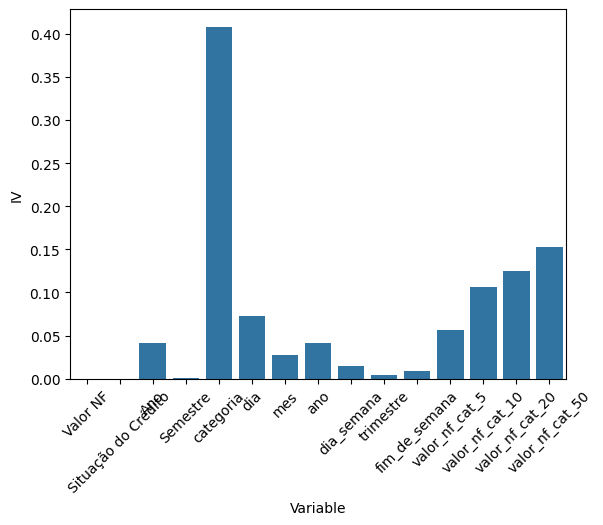

In [416]:
sns.barplot(x=iv_df['Variable'], y=iv_df['IV'])
plt.xticks(rotation=45)

A variável categoria é a que mais discrimina

## Descritiva simples no tempo

Para compor a análise que virá a seguir, faça uma análise descritiva básica no tempo - utilize trimestre como agregação (ou uma média móvel por trimestre, como preferir) e avalie graficamente:

- A quantidade de notas registradas na base por período
- A quantidade de notas por categoria e por período
- A proporção de notas com crédito por categoria por período

In [422]:
df_tempo1 = df[['Valor NF', 'trimestre', 'categoria', 'flag_credito', 'ano']]

Text(0.5, 1.0, 'Quantidade de Notas Fiscais emitidas por Ano e Trimestre')

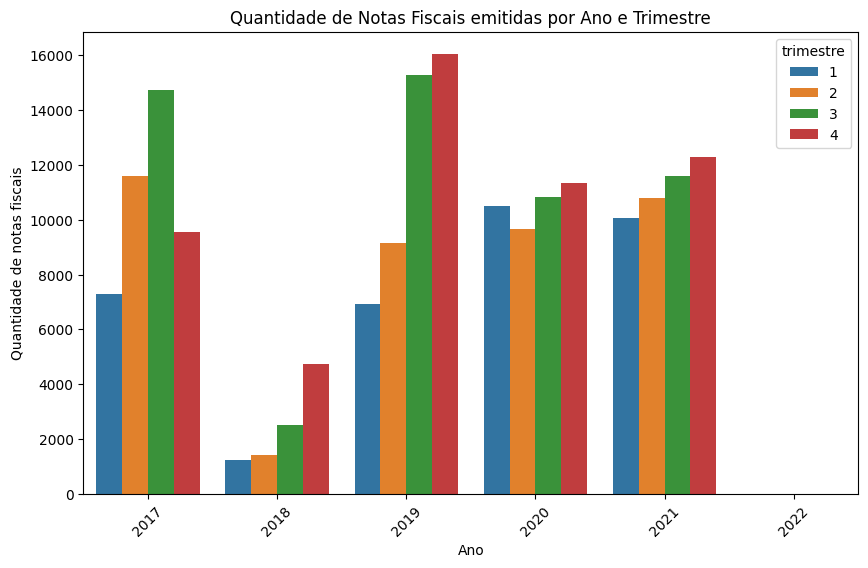

In [424]:
df_tempo1_gp = df_tempo1.groupby(['ano', 'trimestre'], observed=False)['Valor NF'].count().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='ano', y='Valor NF', hue='trimestre', data=df_tempo1_gp)
plt.xticks(rotation=45)
plt.xlabel('Ano')
plt.ylabel('Quantidade de notas fiscais')
plt.title('Quantidade de Notas Fiscais emitidas por Ano e Trimestre')

Text(0.5, 1.0, 'Quantidade de Notas Fiscais emitidas por Ano e Categoria')

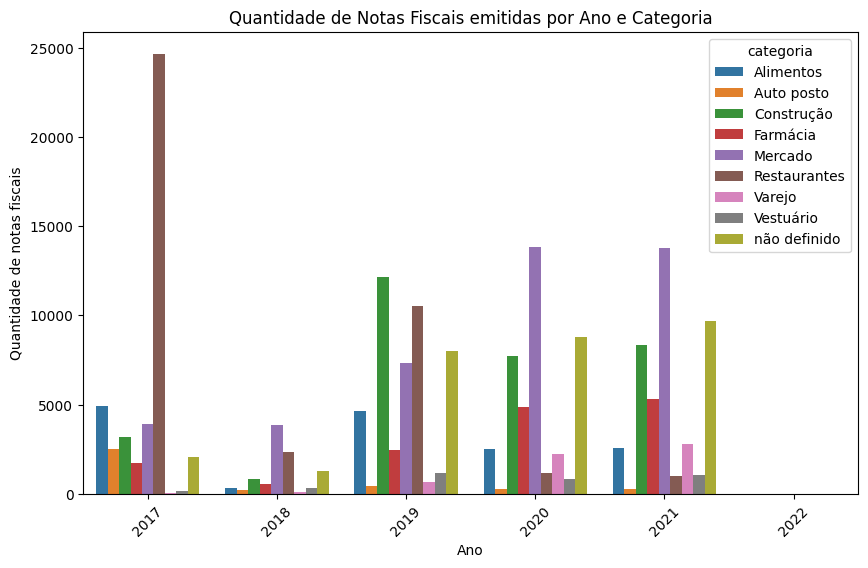

In [426]:
df_tempo1_gp2 = df_tempo1.groupby(['ano', 'categoria'], observed=False)['Valor NF'].count().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='ano', y='Valor NF', hue='categoria', data=df_tempo1_gp2)
plt.xticks(rotation=45)
plt.xlabel('Ano')
plt.ylabel('Quantidade de notas fiscais')
plt.title('Quantidade de Notas Fiscais emitidas por Ano e Categoria')

In [427]:
df_counts = df_tempo1.groupby(['ano', 'categoria', 'flag_credito']).size().unstack(fill_value=0).reset_index()
df_counts.columns = ['ano', 'categoria', 'count_0', 'count_1']
df_counts['ratio_1_to_0'] = df_counts['count_1'] / df_counts['count_0']
df_counts

,ano,categoria,count_0,count_1,ratio_1_to_0
0,2017,Alimentos,70,4867,69.528571
1,2017,Auto posto,2480,9,0.003629
2,2017,Construção,2708,499,0.184269
3,2017,Farmácia,1413,303,0.214437
4,2017,Mercado,2822,1075,0.380936
5,2017,Restaurantes,15288,9371,0.612964
6,2017,Varejo,66,11,0.166667
7,2017,Vestuário,7,163,23.285714
8,2017,não definido,1121,934,0.833185
9,2018,Alimentos,98,229,2.336735


Text(0.5, 1.0, 'Proporção de Notas Fiscais emitidas por Ano e categoria')

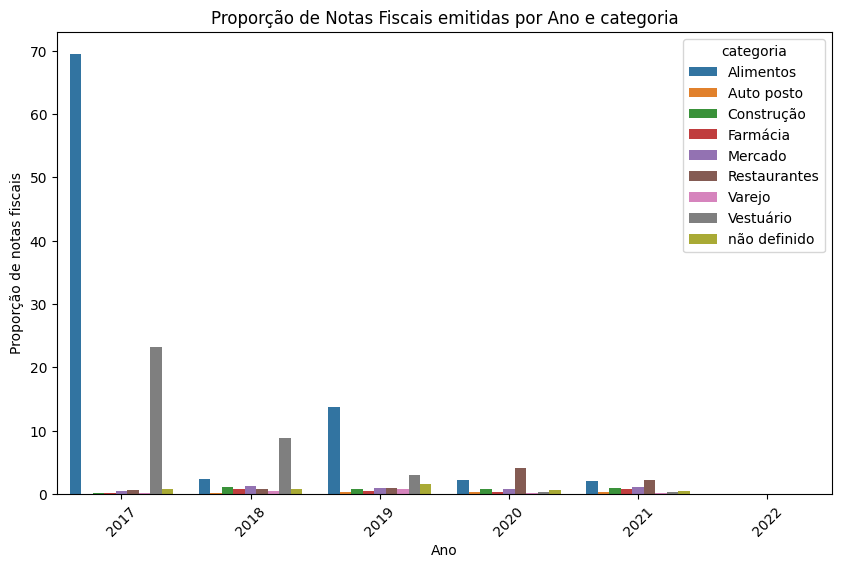

In [428]:
plt.figure(figsize=(10, 6))
sns.barplot(x='ano', y='ratio_1_to_0', hue='categoria', data=df_counts)
plt.xticks(rotation=45)
plt.xlabel('Ano')
plt.ylabel('Proporção de notas fiscais')
plt.title('Proporção de Notas Fiscais emitidas por Ano e categoria')

## Avalie o WOE e o IV no tempo

Avalie o WOE e o IV no tempo da variável ```categoria```.

In [447]:
def calculate_iv_for_group(group):
    return IV(group['categoria'], group['flag_credito'])

In [449]:
df_final = df.groupby('ano').apply(calculate_iv_for_group).reset_index()
df_final.columns = ['ano', 'IV']

C:\Users\Hanga\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Hanga\AppData\Local\Temp\ipykernel_10120\2068434927.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_final = df.groupby('ano').apply(calculate_iv_for_group).reset_index()


In [451]:
df_final[:-1]

,ano,IV
0,2017,2.001040
1,2018,0.270676
2,2019,0.539937
3,2020,0.314055
4,2021,0.307034


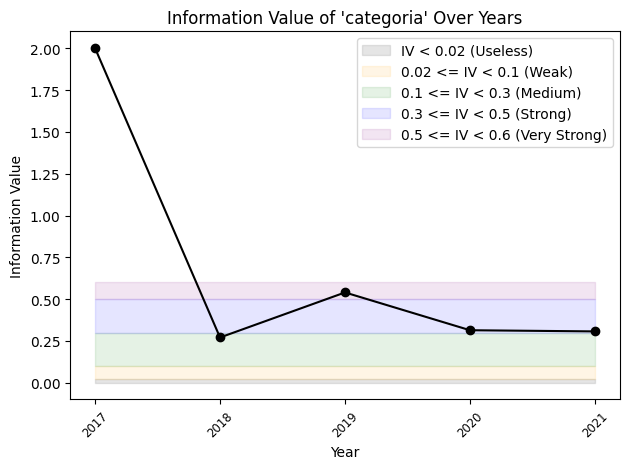

In [456]:
def plot_iv(df_final):
    fig, ax = plt.subplots()
    
    # Extract the IV values and indices
    x = df_final['ano']
    IV = df_final['IV']
    
    # Define the thresholds
    a = [0.02] * len(df_final)
    b = [0.1] * len(df_final)
    c = [0.3] * len(df_final)
    d = [0.5] * len(df_final)
    e = [0.6] * len(df_final)

    # Fill between the thresholds
    ax.fill_between(x, a, color='grey', alpha=0.2, label='IV < 0.02 (Useless)')
    ax.fill_between(x, a, b, color='orange', alpha=0.1, label='0.02 <= IV < 0.1 (Weak)')
    ax.fill_between(x, b, c, color='green', alpha=0.1, label='0.1 <= IV < 0.3 (Medium)')
    ax.fill_between(x, c, d, color='blue', alpha=0.1, label='0.3 <= IV < 0.5 (Strong)')
    ax.fill_between(x, d, e, color='purple', alpha=0.1, label='0.5 <= IV < 0.6 (Very Strong)')
    
    # Plot the IV values
    ax.plot(x, IV, marker='o', linestyle='-', color='black')

    # Customize x-axis labels
    ax.set_xticks(x)
    ax.set_xticklabels(x, rotation=45, fontsize='small')

    ax.set_title("Informação da variável 'Categoria' ao longo dos anos")
    ax.set_ylabel("Information Value")
    ax.set_xlabel("Ano")

    ax.legend()
    plt.tight_layout()
    plt.show()
    
plot_iv(df_final[:-1])

In [458]:
def calculate_woe(df, feature, target):
    eps = 0.000001
    df = df.copy()
    df['count'] = 1
    agg = df.groupby([feature, target])['count'].sum().unstack().fillna(0)
    agg.columns = ['good', 'bad']
    agg['good'] = agg['good'] + eps
    agg['bad'] = agg['bad'] + eps
    agg['distribution_good'] = agg['good'] / agg['good'].sum()
    agg['distribution_bad'] = agg['bad'] / agg['bad'].sum()
    agg['woe'] = np.log(agg['distribution_good'] / agg['distribution_bad'])
    return agg['woe']

In [460]:
def calculate_woe_for_group(group):
    return calculate_woe(group, 'categoria', 'flag_credito')

In [462]:
woe_values = df.groupby('ano').apply(calculate_woe_for_group).reset_index()
woe_values.columns = ['ano', 'categoria', 'WOE']

C:\Users\Hanga\AppData\Local\Temp\ipykernel_10120\566901179.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  woe_values = df.groupby('ano').apply(calculate_woe_for_group).reset_index()


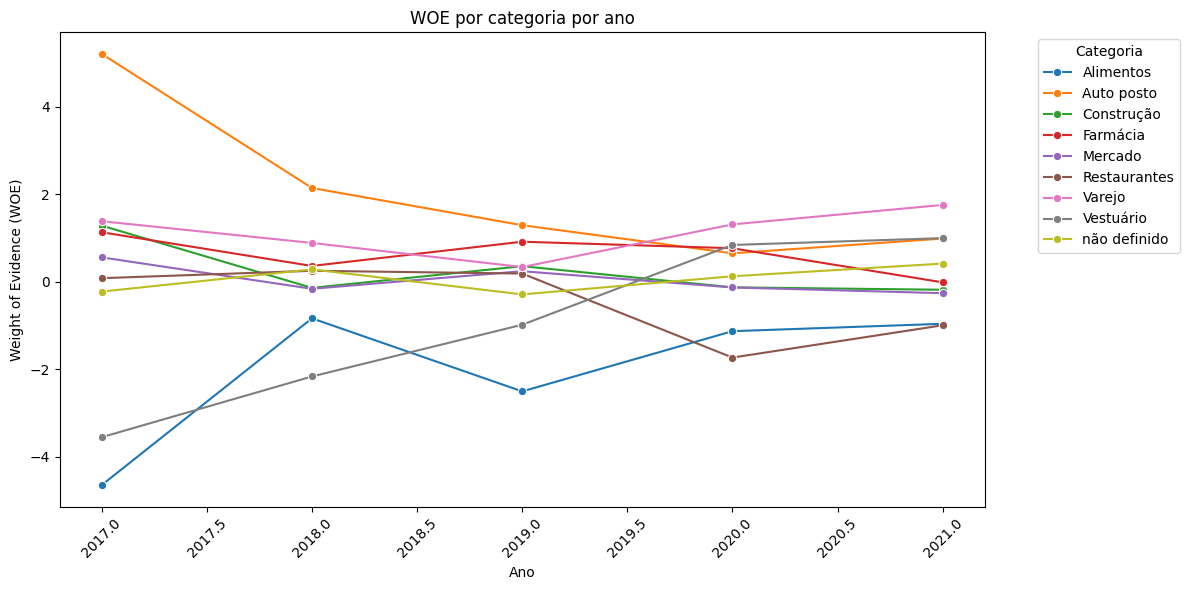

In [470]:
def plot_woe(woe_values):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=woe_values, x='ano', y='WOE', hue='categoria', marker='o')
    plt.xticks(rotation=45)
    plt.title("WOE por categoria por ano")
    plt.ylabel("Weight of Evidence (WOE)")
    plt.xlabel("Ano")
    plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

plot_woe(woe_values[:-2])

## Conclua

- Quais categorias parece ter maior proporção de notas com retornos maiores que zero?
- Essas diferenças são estáveis no tempo?

Dicas:<br>
- Considere que a quantidade de notas vem aumentando
- Considere que há períodos bem atípicos no histórico
- Considere que a partir de janeiro de 2020 o público é mais parecido com o público atual (2022), seja por pandemia, seja por crescimento do público, e considere os dados dessa data em diante na sua conclusão.

### Definitivamente as categorias: alimentos e vestuário são as que vêm apresentando a maior proporção de 1 em relação a 0 para o ratio. As diferenças se apresentam extremamente instáveis

#### A partir do ano de 2020, a principal fonte do crédito de notas fiscais foi advinda da categoria 'mercado', parecendo se consolidar nos anos seguintes.